# State of Data Brazil 2022 - Análise Exploratória de Dados: Descobrindo Tendências no Mercado de Dados

# 1\. Introdução

Neste projeto, iremos explorar e extrair insights valiosos de um conjunto de dados do State of Data Brazil. Utilizando ferramentas poderosas como Google Colab e a linguagem de programação Python as análises de forma estruturada e eficaz.

## 1\.1\. Contexto

O **State of Data Brazil** ([link](https://www.bain.com/contentassets/16494c60fcd045188615f05e728385b3/state-of-data2022_um-raio-x-dos-profissionais-de-dados-do-brasil.pdf)), realizada pelo [Data Hackers](https://www.datahackers.com.br/) e pela [Bain & Company](https://www.bain.com/), é uma das
maiores pesquisas sobre o mercado brasileiro de dados. Dentre os assuntos pesquisado na
última pesquisa (2022), foi mapeado o peral atual das três maiores proassões da área de
dados do Brasil: **engenheiro de dados**, **cientista de dados** e **analista de dados**. O relatório
completo pode ser acessado neste [link](https://www.stateofdata.com.br/).

## 1\.2\. Objetivo

O objetivo principal deste projeto é identificar e analisar a média de salários no mercado de dados, levando em consideração os cargos (Analista, Cientista e Engenheiro de Dados) e seus níveis de experiência. Por meio desta análise, descobrir tendências significativas e insights valiosos que possam auxiliar profissionais, empresas e pesquisadores no entendimento do panorama salarial neste campo em constante evolução.

# 2\. Dados

## 2\.1\. Descrição

Os dados da pesquisa foram disponibilizados no site do Kaggle ([link](https://www.kaggle.com/datasets/datahackers/state-of-data-2022)). O arquivo está no
formato **CSV** (do inglês valores separados por vírgula), possuí **353 colunas** e **4271 linhas** e
"pesa" por volta de **10 MB**.

## 2\.2\. Upload

*Download* do arquivo no Kaggle ([link](https://www.kaggle.com/datasets/datahackers/state-of-data-2022)), formato CSV e realização do *upload* no ambiente do Google Colab.

# 3\. Processamento

## 3\.1\. Leitura

In [57]:
# importando biblioteca Pandas do Python
import pandas as pd

'''
Este código lê um arquivo CSV chamado "State_of_data_2022.csv" e extrai informações específicas de cada linha.
Armazena na lista 'data' como dicionário. Ao final da execução, teremos uma lista com todos os dados relevantes
do arquivo CSV para análise.
'''

data = list()

with open(file='State_of_data_2022.csv', mode='r') as fp:
  header = fp.readline()
  line = fp.readline() #linhas com texto

  while line:
    line = line.split(sep=',') # linha como lista
    data.append({'Cargo': line[21], 'Experiência': line[22], 'Salário': line[23]})
    line = fp.readline() # linhas como texto

# criando um dataframe usando a estrutura de dados 'data'
data_table = pd.DataFrame(data)

In [58]:
# visualizando as primeiras 15 linhas do DataFrame
data_table.head(15)

,Cargo,Experiência,Salário
0,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês
1,Supervisor/Coordenador,,
2,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês
3,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês
4,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês
5,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês
6,Analista de BI/BI Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês
7,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês
8,Analista de BI/BI Analyst,Sênior,de R$ 6.001/mês a R$ 8.000/mês
9,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês


In [59]:
# consultando a qtde de linhas e colunas no DataFrame
data_table.shape

(4271, 3)

### 3\.2\. Limpeza

Remoção dos valores faltantes:

In [60]:
# substituindo conteúdo vazio no df com NA
data_table = data_table.replace('', pd.NA)

# excluindo toda linha que contem NA
data_table = data_table.dropna()

In [61]:
data_table.head(15)

data_table.shape

(2790, 3)

Remoção das linhas corrompidas:



In [62]:
# preenchendo coluna 'Salário' com NA caso a função lambda não encontre a string 'RS'
data_table['Salário'] = data_table['Salário'].apply(lambda row: row if 'R$' in row else pd.NA)

# excluindo toda linha que contem NA
data_table = data_table.dropna()

In [63]:
data_table.head(15)

data_table.shape

(2386, 3)

### 3\.3\. Formatação e Seleção dos Campos de Interesse

In [64]:
# criando uma lista com apenas os cargos de interesse
positions = ['Analista de Dados/Data Analyst', 'Cientista de Dados/Data Scientist',  'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect']

In [65]:
# filtrando dados na coluna 'cargo' com base na lista 'positions' aplicando a função lambda para manter apenas conteúdo da lista ou substituindo por NA
data_table['Cargo'] = data_table['Cargo'].apply(lambda row: row if row in positions else pd.NA)

<ipython-input-65-58d05c3361ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table['Cargo'] = data_table['Cargo'].apply(lambda row: row if row in positions else pd.NA)


In [66]:
# excluindo toda linha que contem NA
data_table = data_table.dropna()

In [67]:
data_table.head(15)

,Cargo,Experiência,Salário
3,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês
18,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 6.001/mês a R$ 8.000/mês
23,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 12.001/mês a R$ 16.000/mês
29,Cientista de Dados/Data Scientist,Júnior,de R$ 8.001/mês a R$ 12.000/mês
30,Analista de Dados/Data Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês
31,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 2.001/mês a R$ 3.000/mês
37,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 2.001/mês a R$ 3.000/mês
41,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 4.001/mês a R$ 6.000/mês
45,Cientista de Dados/Data Scientist,Sênior,de R$ 6.001/mês a R$ 8.000/mês
49,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 8.001/mês a R$ 12.000/mês


In [68]:
data_table.shape

(1336, 3)

Renomeando as profissões

In [69]:
# criando nova lista com cargos resumidos
positions_update = ['Analista', 'Cientista', 'Engenharia']

In [70]:
# criando dicionário com função zip para combinar os elementos de duas listas
positions_update = dict(zip(positions, positions_update))

In [71]:
# substituindo os valores da coluna 'Cargo' pelos valores correspondentes do dicionário 'positions_update'
data_table.loc[:, 'Cargo'] = data_table['Cargo'].apply(lambda row: positions_update[row])

In [72]:
data_table.head(15)

,Cargo,Experiência,Salário
3,Cientista,Sênior,de R$ 12.001/mês a R$ 16.000/mês
18,Engenharia,Pleno,de R$ 6.001/mês a R$ 8.000/mês
23,Engenharia,Sênior,de R$ 12.001/mês a R$ 16.000/mês
29,Cientista,Júnior,de R$ 8.001/mês a R$ 12.000/mês
30,Analista,Júnior,de R$ 3.001/mês a R$ 4.000/mês
31,Engenharia,Júnior,de R$ 2.001/mês a R$ 3.000/mês
37,Engenharia,Júnior,de R$ 2.001/mês a R$ 3.000/mês
41,Engenharia,Júnior,de R$ 4.001/mês a R$ 6.000/mês
45,Cientista,Sênior,de R$ 6.001/mês a R$ 8.000/mês
49,Engenharia,Sênior,de R$ 8.001/mês a R$ 12.000/mês


# 4\. Insights

## 4\.1\. Análise da quantidade de pessoas por salário, cargo e nível de experiência

**Agrupamento e Agregações**

###**Por Salário**

In [73]:
# criando nova coluna no dataframe com valor unitário = 1
data_table['Quantidade'] = 1

In [74]:
# novo dataframe com a soma de cada valor único na coluna 'Salário' utilizando agregação
salario_agg = data_table[['Salário', 'Quantidade']].groupby('Salário').agg('sum').reset_index()

In [75]:
# criando um dicionário para ordenação por salário
salario_ordem = {
'Menos de R$ 1.000/mês': 0,
'de R$ 1.001/mês a R$ 2.000/mês': 1,
'de R$ 2.001/mês a R$ 3.000/mês': 2,
'de R$ 3.001/mês a R$ 4.000/mês': 3,
'de R$ 4.001/mês a R$ 6.000/mês': 4,
'de R$ 6.001/mês a R$ 8.000/mês': 5,
'de R$ 8.001/mês a R$ 12.000/mês': 6,
'de R$ 12.001/mês a R$ 16.000/mês': 7,
'de R$ 16.001/mês a R$ 20.000/mês': 8,
'de R$ 20.001/mês a R$ 25.000/mês': 9,
'de R$ 25.001/mês a R$ 30.000/mês': 10,
'de R$ 30.001/mês a R$ 40.000/mês': 11,
'Acima de R$ 40.001/mês': 12
}

In [76]:
# adicionando nova coluna no dataframe e mapeando os valores únicos da coluna 'Salário' para os respectivos valores na coluna 'Ordem'
salario_agg['Ordem'] = salario_agg['Salário'].apply(lambda row: salario_ordem[row])

In [77]:
# ordenando de forma ascendente o dataframe pelo salário
salario_agg = salario_agg.sort_values(by='Ordem', ascending=True)

In [78]:
salario_agg.head(15)

,Salário,Quantidade,Ordem
1,Menos de R$ 1.000/mês,8,0
2,de R$ 1.001/mês a R$ 2.000/mês,59,1
5,de R$ 2.001/mês a R$ 3.000/mês,75,2
8,de R$ 3.001/mês a R$ 4.000/mês,89,3
10,de R$ 4.001/mês a R$ 6.000/mês,244,4
11,de R$ 6.001/mês a R$ 8.000/mês,234,5
12,de R$ 8.001/mês a R$ 12.000/mês,320,6
3,de R$ 12.001/mês a R$ 16.000/mês,192,7
4,de R$ 16.001/mês a R$ 20.000/mês,49,8
6,de R$ 20.001/mês a R$ 25.000/mês,24,9


**Visualização**

Gerando um gráfico de barras. No eixo **x** temos o **salário**
(representado pela sua ordem) e no eixo **y**, a **quantidade** de profissionais. A cor das barras e
a legenda também representam o **salário**.

In [79]:
import seaborn as sns

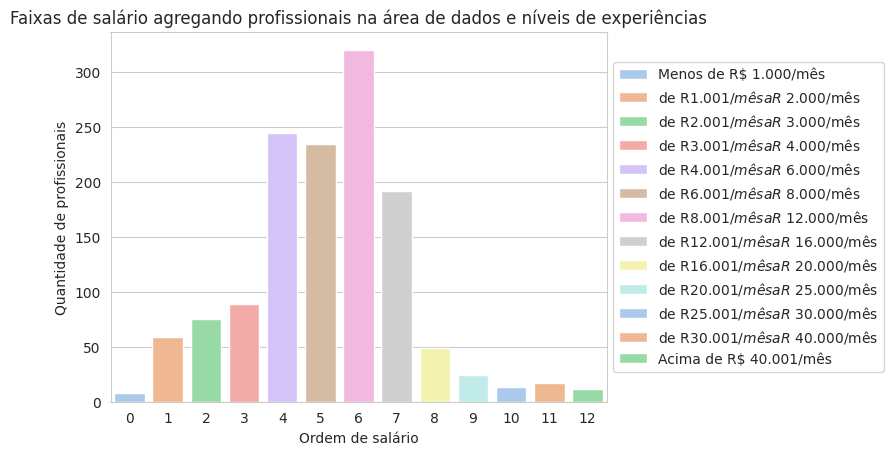

In [80]:
with sns.axes_style('whitegrid'):
  plot = sns.barplot(data=salario_agg, x='Ordem', y='Quantidade', hue='Salário', palette='pastel')
  plot.set_title('Faixas de salário agregando profissionais na área de dados e níveis de experiências')
  plot.set_ylabel('Quantidade de profissionais')
  plot.set_xlabel('Ordem de salário')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

* Gráfico 01 - Gráfico de barras com Análise da Distribuição Salarial de Profissionais da Área de Dados

**Resultados**

* A representação do comportamento salarial no gráfico reflete uma distribuição normal dos salários nas informações apresentadas.

* Os salários para as funções relacionadas aos dados se concentram predominantemente na faixa entre RS 4.000 e R$ 16.000, variando de acordo com o nível de experiência na área. Estes valores são bastante representativos no atual mercado.

* De forma geral, é perceptível que um profissional localizado no extremo esquerdo do gráfico pode se preocupar com a possibilidade de seu cargo ou empresa não estar devidamente valorizado.

* Por outro lado, aqueles no extremo direito do gráfico merecem reconhecimento, pois estão sendo altamente valorizados pelo impacto que estão gerando para a empresa.

Concluí-se, que o mercado tende a se concentrar na região central do gráfico (4 a 7).

###**Por salário e cargo**

In [81]:
# agrupando os dados pelas colunas 'Cargo' e 'Salário'
salario_cargo_agg = data_table[['Cargo', 'Salário', 'Quantidade']].groupby(['Cargo', 'Salário']).agg('sum')

In [82]:
# redefinindo o índice do dataframe
salario_cargo_agg.reset_index(inplace=True)

In [83]:
# adicionando nova coluna no dataframe e mapeando os valores únicos da coluna 'Salário' para os respectivos valores na coluna 'Ordem'
salario_cargo_agg['Ordem'] = salario_cargo_agg['Salário'].apply(lambda row: salario_ordem[row])

In [84]:
# classificando o dataframe primeiro pelo 'Cargo' e dentro de cada 'Cargo' classicando os salários de acordo com a ordem especificada
salario_cargo_agg = salario_cargo_agg.sort_values(by=['Cargo', 'Ordem'], ascending=[True, True])

In [85]:
salario_cargo_agg.head(100)

,Cargo,Salário,Quantidade,Ordem
1,Analista,Menos de R$ 1.000/mês,4,0
2,Analista,de R$ 1.001/mês a R$ 2.000/mês,28,1
5,Analista,de R$ 2.001/mês a R$ 3.000/mês,36,2
8,Analista,de R$ 3.001/mês a R$ 4.000/mês,59,3
10,Analista,de R$ 4.001/mês a R$ 6.000/mês,122,4
11,Analista,de R$ 6.001/mês a R$ 8.000/mês,91,5
12,Analista,de R$ 8.001/mês a R$ 12.000/mês,106,6
3,Analista,de R$ 12.001/mês a R$ 16.000/mês,35,7
4,Analista,de R$ 16.001/mês a R$ 20.000/mês,6,8
6,Analista,de R$ 20.001/mês a R$ 25.000/mês,4,9


**Visualização**

Aplicando um segundo nível de agregação, incrementa-se o gráfico anterior com a informação do **cargo**

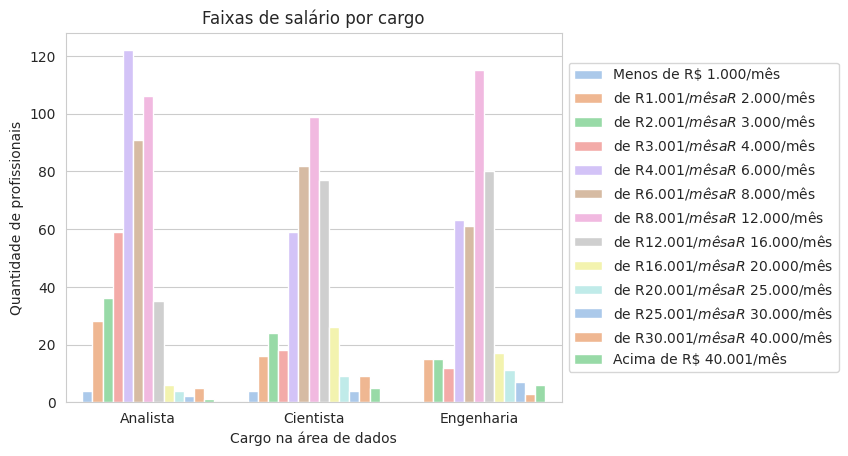

In [86]:
with sns.axes_style('whitegrid'):
  plot = sns.barplot(data=salario_cargo_agg, x='Cargo', y='Quantidade', hue='Salário', palette='pastel')
  plot.set_title('Faixas de salário por cargo')
  plot.set_ylabel('Quantidade de profissionais')
  plot.set_xlabel('Cargo na área de dados')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

* Gráfico 02 - Gráfico de barras com Análise da Distribuição Salarial por Cargo de Profissionais da Área de Dados

**Resultados**

**1\. Variação nas Faixas Salariais por Cargo:**

* As faixas salariais mais comuns diferem entre os diversos cargos analisados. Por exemplo, para Analistas, a faixa de RS 4.001/mês a RS 6.000/mês é predominante, enquanto para Cientistas e Engenheiros, é a faixa de RS 8.001/mês a RS 12.000/mês.

**2\. Disponibilidade de Vagas no Mercado de Dados:**

* Observa-se uma predominância de vagas disponíveis no mercado de dados para o cargo de Analista. Isso sugere uma demanda robusta por profissionais com esse perfil e pode indicar oportunidades significativas para aqueles interessados em ingressar nesse campo específico.

**3\. Mercado de Dados em Ascensão:**

* Os dados revelam um mercado de dados em ascensão, caracterizado pelo pagamento de salários atrativos aos profissionais da área. Isso reflete uma valorização crescente das habilidades e expertise relacionadas aos dados, indicando um setor dinâmico e em constante evolução.

###**Por salário, cargo e experiência**

In [87]:
# no terceiro nível de agregação, contando quantos profissionais estão em cada faixa de salário por cargo e nivel de experiência.
salario_cargo_experiencia_agg = data_table[['Cargo', 'Experiência', 'Salário', 'Quantidade']].groupby(['Cargo', 'Experiência', 'Salário']).agg('sum').reset_index()

In [88]:
# adicionando nova coluna no dataframe e mapeando os valores únicos da coluna 'Salário' para os respectivos valores na coluna 'Ordem'
salario_cargo_experiencia_agg['Ordem'] = salario_cargo_experiencia_agg['Salário'].apply(lambda row: salario_ordem[row])

In [89]:
# classificando o dataframe com base em três colunas
salario_cargo_experiencia_agg = salario_cargo_experiencia_agg.sort_values(by=['Cargo', 'Experiência', 'Ordem'], ascending=[True, True, True])

In [90]:
salario_cargo_experiencia_agg.head(30)

,Cargo,Experiência,Salário,Quantidade,Ordem
0,Analista,Júnior,Menos de R$ 1.000/mês,4,0
1,Analista,Júnior,de R$ 1.001/mês a R$ 2.000/mês,26,1
2,Analista,Júnior,de R$ 2.001/mês a R$ 3.000/mês,34,2
3,Analista,Júnior,de R$ 3.001/mês a R$ 4.000/mês,46,3
4,Analista,Júnior,de R$ 4.001/mês a R$ 6.000/mês,54,4
5,Analista,Júnior,de R$ 6.001/mês a R$ 8.000/mês,12,5
6,Analista,Júnior,de R$ 8.001/mês a R$ 12.000/mês,1,6
7,Analista,Pleno,de R$ 1.001/mês a R$ 2.000/mês,1,1
10,Analista,Pleno,de R$ 2.001/mês a R$ 3.000/mês,2,2
13,Analista,Pleno,de R$ 3.001/mês a R$ 4.000/mês,12,3


**Visualização**

Por fim, no terceiro nível, aplicando a mesma técnica do gráfico anterior, mas agora
distribuídos por **experiência** (eixo **x**) e **cargo** ( DataFrame dedicado).

###* Analista

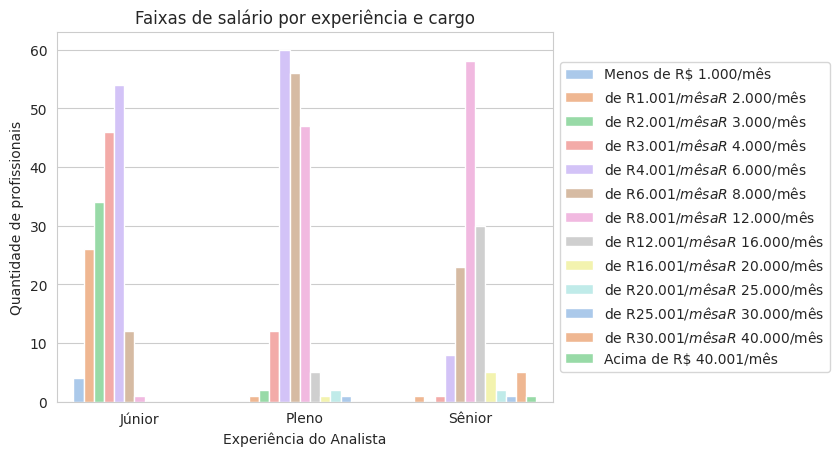

In [91]:
data = salario_cargo_experiencia_agg[salario_cargo_experiencia_agg['Cargo'] == 'Analista']

with sns.axes_style('whitegrid'):
  plot = sns.barplot(data=data, x='Experiência', y='Quantidade', hue='Salário', palette='pastel')
  plot.set_title('Faixas de salário por experiência e cargo')
  plot.set_ylabel('Quantidade de profissionais')
  plot.set_xlabel('Experiência do Analista')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

* Gráfico 03 - Gráfico de barras mostrando a distribuição salarial por experiência para o cargo de Analista.

**Resultados**

**1\. Distribuição Salarial Distinta por Nível de Experiência:**
* É observada uma distribuição salarial distintiva para os diferentes níveis de experiência dos Analistas.
* Para Analistas Júnior, as faixas salariais mais notáveis são de RS 2.000 a RS 6.000/mês.
* Já para Analistas Pleno, as faixas salariais se destacam de RS 4.000 a RS 12.000/mês.
* Por fim, para Analistas Sênior, as faixas salariais mais proeminentes abrangem de RS 8.000 a RS 16.000/mês.

###* Cientista

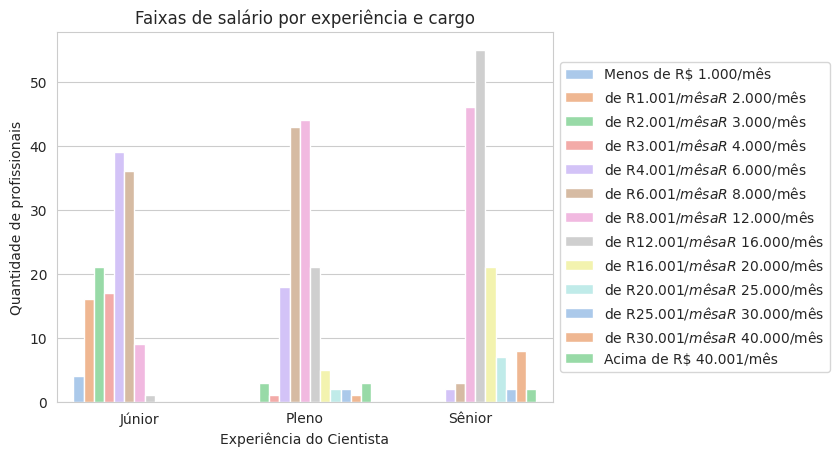

In [92]:
data = salario_cargo_experiencia_agg[salario_cargo_experiencia_agg['Cargo'] == 'Cientista']

with sns.axes_style('whitegrid'):
  plot = sns.barplot(data=data, x='Experiência', y='Quantidade', hue='Salário', palette='pastel')
  plot.set_title('Faixas de salário por experiência e cargo')
  plot.set_ylabel('Quantidade de profissionais')
  plot.set_xlabel('Experiência do Cientista')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

* Gráfico 04 - Gráfico de barras mostrando a distribuição salarial por experiência para o cargo de Cientista.

**Resultados**

**1\. Diferença Salarial entre Cientista Júnior e Analista Júnior:**
* O Cientista Júnior apresenta uma tendência de ganhar ligeiramente mais em comparação com o Analista Júnior. Essa diferença salarial pode ser atribuída à natureza especializada e técnica do papel de Cientista de Dados.

**2\. Prevalência de Salários Mais Altos entre os Cientistas:**
* Observa-se que uma proporção maior de Cientistas recebe salários mais elevados em comparação com Analistas. Isso sugere que os salários na profissão de Cientista tendem a ser mais altos, possivelmente devido à demanda crescente por habilidades avançadas em ciência de dados e análise de dados.

###* Engenheira

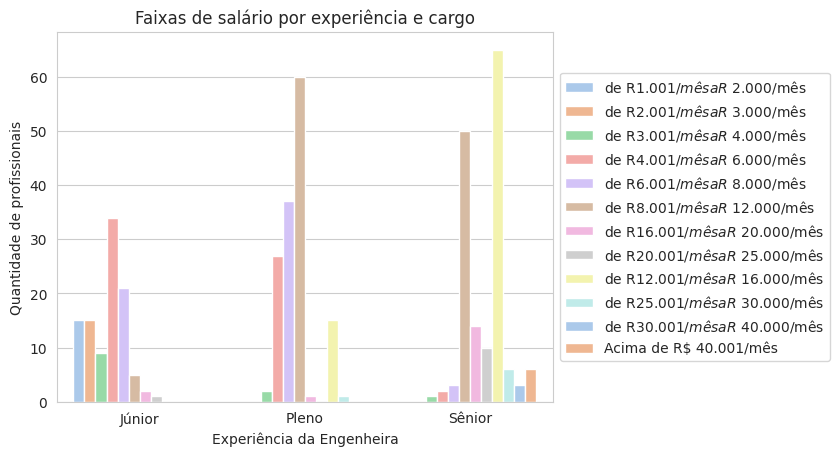

In [93]:
data = salario_cargo_experiencia_agg[salario_cargo_experiencia_agg['Cargo'] == 'Engenharia']

with sns.axes_style('whitegrid'):
  plot = sns.barplot(data=data, x='Experiência', y='Quantidade', hue='Salário', palette='pastel')
  plot.set_title('Faixas de salário por experiência e cargo')
  plot.set_ylabel('Quantidade de profissionais')
  plot.set_xlabel('Experiência da Engenheira')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

* Gráfico 05 - Gráfico de barras mostrando a distribuição salarial por experiência para o cargo de Engenheira.

**Resultados**

**1\. Variação Salarial por Nível de Experiência entre Engenheiros:**
* A distribuição salarial entre os Engenheiros exibe múltiplos picos, indicando a presença de faixas salariais mais elevadas para os três níveis de experiência. Esses picos sugerem que os Engenheiros podem beneficiar-se de melhores oportunidades de remuneração em comparação com outras profissões dentro do mesmo campo.

**2\. Discrepâncias na Disponibilidade de Vagas por Cargo e Experiência:**
* Nota-se uma disparidade na disponibilidade de vagas entre os diferentes cargos e níveis de experiência. Enquanto há uma quantidade significativa de vagas disponíveis para Analistas Júnior e Pleno, a oferta de vagas para Engenharia Sênior é relativamente menor em comparação com outras categorias de experiência. Essa discrepância sugere uma possível demanda por profissionais mais experientes em cargos de Engenharia, o que pode refletir a necessidade de habilidades especializadas e conhecimento avançado no campo.